# 5주차-4월 04일
> 빅데이터분석특강

- toc:false
- branch: master
- badges: true
- comments: true
- author: 심재인

### 강의영상 


> youtube: https://youtube.com/playlist?list=PLQqh36zP38-wVWUAZ5xT35INvWbNOXpBx

### imports 

In [1]:
#
#!conda install -c conda-forge python-graphviz -y

In [2]:
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt 

In [3]:
import tensorflow.experimental.numpy as tnp 

In [4]:
tnp.experimental_enable_numpy_behavior() 

### 최적화의 문제 

`-` $loss=(\frac{1}{2}\beta-1)^2$ 

`-` 기존에 했던 방법은 수식을 알고 있어야 한다는 단점이 있음 

### tf.keras.optimizers를 이용한 최적화방법 

#### 방법1: opt.apply_gradients()를 이용 

In [5]:
alpha= 0.01/6

In [6]:
beta= tf.Variable(-10.0) 

2022-04-25 14:39:32.750112: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


In [7]:
opt = tf.keras.optimizers.SGD(alpha)

`-` iter1

In [8]:
with tf.GradientTape() as tape: 
    tape.watch(beta) 
    loss=(beta/2-1)**2 
slope = tape.gradient(loss,beta)

In [9]:
opt.apply_gradients([(slope,beta)]) # beta.assign_sub(slope * alpha) 
beta

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-9.99>

`-` iter2

In [10]:
with tf.GradientTape() as tape: 
    tape.watch(beta) 
    loss=(beta/2-1)**2 
slope = tape.gradient(loss,beta)
opt.apply_gradients([(slope,beta)]) # beta.assign_sub(slope * alpha) 
beta

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-9.980008>

`-` for문으로 정리 

In [11]:
alpha= 0.01/6
beta= tf.Variable(-10.0) 
opt = tf.keras.optimizers.SGD(alpha)

In [12]:
for epoc in range(10000): 
    with tf.GradientTape() as tape: 
        tape.watch(beta) 
        loss=(beta/2-1)**2 
    slope = tape.gradient(loss,beta)
    opt.apply_gradients([(slope,beta)]) # beta.assign_sub(slope * alpha) 
    beta

In [13]:
beta

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.9971251>

- opt.apply_gradients()의 입력은 pair 의 list 

#### 방법2: opt.minimize()

In [14]:
alpha= 0.01/6
beta= tf.Variable(-10.0) 
opt = tf.keras.optimizers.SGD(alpha)

In [15]:
loss_fn = lambda: (beta/2-1)**2

- `lambda x: x**2` <=> `lambda(x)=x^2`
- `lambda x,y: x+y` <=> `lambda(x,y)=x+y` 
- `lambda: y` <=> `lambda()=y`, 입력이 없으며 출력은 항상 y인 함수 

In [16]:
loss_fn() # 입력은 없고 출력은 뭔가 계산되는 함수 

<tf.Tensor: shape=(), dtype=float32, numpy=36.0>

`-` iter 1

In [17]:
opt.minimize(loss_fn, beta)

<tf.Variable 'UnreadVariable' shape=() dtype=int64, numpy=1>

In [18]:
beta

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-9.99>

`-` iter2 

In [19]:
opt.minimize(loss_fn, beta)
beta

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-9.980008>

`-` for문으로 정리하면 

In [20]:
alpha= 0.01/6
beta= tf.Variable(-10.0) 
opt = tf.keras.optimizers.SGD(alpha)
loss_fn = lambda: (beta/2-1)**2
for epoc in range(10000): 
    opt.minimize(loss_fn, beta)
beta

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.9971251>

### 회귀분석 문제

`-` ${\bf y} \approx 2.5 + 4.0 {\bf x}$

In [21]:
tnp.random.seed(43052)
N = 200
x = tnp.linspace(0,1,N) 
epsilon = tnp.random.randn(N)*0.5
y = 2.5+4*x + epsilon
y_true = 2.5+4*x

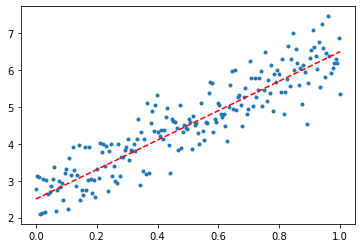

In [22]:
plt.plot(x,y,'.')
plt.plot(x,y_true,'r--')

### 이론적 풀이

#### 풀이1: 스칼라버전

`-` 포인트 
- $S_{xx}=$, $S_{xy}=$
- $\hat{\beta}_0=$, $\hat{\beta}_1=$

`-` 풀이

In [23]:
Sxx = sum((x-x.mean())**2)
Sxy = sum((x-x.mean())*(y-y.mean()))

In [24]:
beta1_hat = Sxy/Sxx 
beta1_hat

<tf.Tensor: shape=(), dtype=float64, numpy=3.933034516733168>

In [25]:
beta0_hat = y.mean() - x.mean()*beta1_hat
beta0_hat

<tf.Tensor: shape=(), dtype=float64, numpy=2.583667211565867>

#### 풀이2: 벡터버전

`-` 포인트
- $\hat{\beta}=(X'X)^{-1}X'y$

`-` 풀이

In [26]:
y=y.reshape(N,1)
X=tf.stack([tf.ones(N,dtype=tf.float64),x],axis=1)
y.shape,X.shape

(TensorShape([200, 1]), TensorShape([200, 2]))

In [27]:
tf.linalg.inv(X.T @ X ) @ X.T @ y 

<tf.Tensor: shape=(2, 1), dtype=float64, numpy=
array([[2.58366721],
       [3.93303452]])>

#### 풀이3: 벡터버전, 손실함수의 도함수이용 

`-` 포인트
- $loss'(\beta)=-2X'y +2X'X\beta$
- $\beta_{new} = \beta_{old} - \alpha \times loss'(\beta_{old})$

`-` 풀이

In [28]:
y=y.reshape(N,1)
y.shape,X.shape

(TensorShape([200, 1]), TensorShape([200, 2]))

In [29]:
beta_hat = tnp.array([-5,10]).reshape(2,1)
beta_hat

<tf.Tensor: shape=(2, 1), dtype=int64, numpy=
array([[-5],
       [10]])>

In [30]:
slope = (-2*X.T @ y + 2*X.T @ X @ beta_hat) / N 
slope

<tf.Tensor: shape=(2, 1), dtype=float64, numpy=
array([[-9.10036894],
       [-3.52886113]])>

In [31]:
alpha= 0.1 

In [32]:
step = slope*alpha
step

<tf.Tensor: shape=(2, 1), dtype=float64, numpy=
array([[-0.91003689],
       [-0.35288611]])>

In [33]:
for epoc in range(1000): 
    slope = (-2*X.T @ y + 2*X.T @ X @ beta_hat)/N 
    beta_hat = beta_hat - alpha* slope

In [34]:
beta_hat

<tf.Tensor: shape=(2, 1), dtype=float64, numpy=
array([[2.58366061],
       [3.93304684]])>

### GradientTape를 이용 

#### 풀이1: 벡터버전

`-` 포인트
```python
## 포인트코드1: 그레디언트 테입  
with tf.GradientTape() as tape: 
    loss = 
## 포인트코드2: 미분 
slope = tape.gradient(loss,beta_hat) 
## 포인트코드3: update 
beta_hat.assign_sub(slope*alph) 
```

`-` 풀이

In [35]:
y=y.reshape(N,1)
y.shape,X.shape

(TensorShape([200, 1]), TensorShape([200, 2]))

In [36]:
beta_hat = tf.Variable(tnp.array([-5.0,10.0]).reshape(2,1))
beta_hat

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float64, numpy=
array([[-5.],
       [10.]])>

In [37]:
alpha=0.1

In [38]:
for epoc in range(1000):
    with tf.GradientTape() as tape: 
        yhat= X@beta_hat
        loss= (y-yhat).T @ (y-yhat) / N
    slope = tape.gradient(loss,beta_hat) 
    beta_hat.assign_sub(alpha*slope) 

In [39]:
beta_hat

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float64, numpy=
array([[2.58366061],
       [3.93304684]])>

#### 풀이2: 스칼라버전

`-` 포인트
```python
## 포인트코드: 미분
slope0,slope1 = tape.gradient(loss,[beta0_hat,beta1_hat])
```

`-` 풀이

In [40]:
y=y.reshape(-1)
y.shape,x.shape

(TensorShape([200]), TensorShape([200]))

In [41]:
beta0_hat = tf.Variable(-5.0)
beta1_hat = tf.Variable(10.0)

In [42]:
alpha=0.1

In [43]:
for epoc in range(1000):
    with tf.GradientTape() as tape: 
        yhat= beta0_hat + x*beta1_hat 
        loss= tf.reduce_sum((y-yhat)**2)/N #loss= sum((y-yhat)**2)/N
    slope0,slope1 = tape.gradient(loss,[beta0_hat,beta1_hat]) 
    beta0_hat.assign_sub(alpha*slope0)
    beta1_hat.assign_sub(alpha*slope1)

In [44]:
beta0_hat,beta1_hat

(<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=2.58366>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=3.933048>)

### GradientTape + opt.apply_gradients

#### 풀이1: 벡터버전 

`-` 포인트 
```python
## 포인트코드: 업데이트
opt.apply_gradients([(slope,beta_hat)])  ## pair의 list가 입력 
```

`-` 풀이

In [45]:
y=y.reshape(N,1)
y.shape,X.shape

(TensorShape([200, 1]), TensorShape([200, 2]))

In [46]:
beta_hat = tf.Variable(tnp.array([-5.0,10.0]).reshape(2,1))
beta_hat

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float64, numpy=
array([[-5.],
       [10.]])>

In [47]:
alpha=0.1
opt = tf.optimizers.SGD(alpha)

In [48]:
for epoc in range(1000):
    with tf.GradientTape() as tape: 
        yhat= X@beta_hat
        loss= (y-yhat).T @ (y-yhat) / N
    slope = tape.gradient(loss,beta_hat)
    opt.apply_gradients([(slope,beta_hat)])
    #beta_hat.assign_sub(alpha*slope) 

In [49]:
beta_hat

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float64, numpy=
array([[2.58366061],
       [3.93304684]])>

#### 풀이2: 스칼라버전 

`-` 포인트
```python
## 포인트코드: 업데이트 
opt.apply_gradients([(slope0,beta0_hat),(slope1,beta1_hat)]) ## pair의 list가 입력 
```

`-` 풀이

In [50]:
y=y.reshape(-1)
y.shape,x.shape

(TensorShape([200]), TensorShape([200]))

In [51]:
beta0_hat = tf.Variable(-5.0)
beta1_hat = tf.Variable(10.0)

In [52]:
alpha=0.1
opt = tf.optimizers.SGD(alpha)

In [53]:
for epoc in range(1000):
    with tf.GradientTape() as tape: 
        yhat= beta0_hat + beta1_hat*x #X@beta_hat
        loss= tf.reduce_sum((y-yhat)**2) / N
    slope0,slope1 = tape.gradient(loss,[beta0_hat,beta1_hat])
    opt.apply_gradients([(slope0,beta0_hat),(slope1,beta1_hat)])

In [54]:
beta0_hat,beta1_hat

(<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=2.58366>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=3.933048>)

### opt.minimize

#### 풀이1: 벡터버전, 사용자정의 손실함수 with lambda

`-` 풀이 

In [55]:
y=y.reshape(N,1)
y.shape,X.shape

(TensorShape([200, 1]), TensorShape([200, 2]))

In [56]:
beta_hat = tf.Variable(tnp.array([-5.0,10.0]).reshape(2,1))
beta_hat

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float64, numpy=
array([[-5.],
       [10.]])>

In [57]:
loss_fn = lambda: (y-X@beta_hat).T @ (y-X@beta_hat) / N 

In [58]:
alpha=0.1 
opt = tf.optimizers.SGD(alpha)

In [59]:
for epoc in range(1000): 
    opt.minimize(loss_fn,beta_hat)

In [60]:
beta_hat

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float64, numpy=
array([[2.58366061],
       [3.93304684]])>

#### 풀이2: 스칼라버전, 사용자정의 손실함수 with lambda

`-` 포인트
```python
## 포인트코드: 미분 & 업데이트 = minimize 
opt.minimize(loss_fn,[beta0_hat,beta1_hat])
```

`-` 풀이 

In [61]:
y=y.reshape(-1)
y.shape,x.shape

(TensorShape([200]), TensorShape([200]))

In [62]:
beta0_hat = tf.Variable(-5.0)
beta1_hat = tf.Variable(10.0) 

In [63]:
loss_fn = lambda: tf.reduce_sum((y-beta0_hat-beta1_hat*x )**2) / N 

In [64]:
alpha=0.1 
opt = tf.optimizers.SGD(alpha)

In [65]:
for epoc in range(1000): 
    opt.minimize(loss_fn,[beta0_hat,beta1_hat])

In [66]:
beta0_hat,beta1_hat

(<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=2.58366>,
 <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=3.933048>)

#### 풀이3: 벡터버전, 사용자정의 (짧은) 손실함수 

`-` 포인트
```python
## 포인트코드: 손실함수정의 
def loss_fn():
    return ??
```

`-` 풀이 

In [67]:
y=y.reshape(N,1)
y.shape,X.shape

(TensorShape([200, 1]), TensorShape([200, 2]))

In [68]:
beta_hat = tf.Variable(tnp.array([-5.0,10.0]).reshape(2,1))
beta_hat

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float64, numpy=
array([[-5.],
       [10.]])>

In [69]:
def loss_fn():
    return (y-X@beta_hat).T @ (y-X@beta_hat) / N 

In [70]:
alpha=0.1 
opt = tf.optimizers.SGD(alpha)

In [71]:
for epoc in range(1000): 
    opt.minimize(loss_fn,beta_hat)

In [72]:
beta_hat

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float64, numpy=
array([[2.58366061],
       [3.93304684]])>

#### 풀이4: 벡터버전, 사용자정의 (긴) 손실함수 

`-` 포인트
```python
## 포인트코드: 손실함수정의 
def loss_fn():
    ??
    ??
    return ??
```

`-` 풀이 

In [73]:
y=y.reshape(N,1)
y.shape,X.shape

(TensorShape([200, 1]), TensorShape([200, 2]))

In [74]:
beta_hat = tf.Variable(tnp.array([-5.0,10.0]).reshape(2,1))
beta_hat

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float64, numpy=
array([[-5.],
       [10.]])>

In [75]:
def loss_fn():
    yhat= X@beta_hat # 컴퓨터한테 전달할 수식1
    loss = (y-yhat).T @ (y-yhat) / N # 컴퓨터한테 전달할 수식 2 
    return loss # tape.gradient(loss,beta_hat) 에서의 미분당하는애 

In [76]:
alpha=0.1 
opt = tf.optimizers.SGD(alpha)

In [77]:
for epoc in range(1000): 
    opt.minimize(loss_fn,beta_hat)

In [78]:
beta_hat

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float64, numpy=
array([[2.58366061],
       [3.93304684]])>

#### 풀이5: 벡터버전, 사용자정의 손실함수 <- tf.losses.MSE 

`-` 포인트
```python
## 포인트코드: 미리구현되어있는 손실함수 이용 
tf.losses.MSE(y,yhat)
```

`-` 풀이 

In [79]:
y=y.reshape(N,1)
y.shape,X.shape

(TensorShape([200, 1]), TensorShape([200, 2]))

In [80]:
beta_hat = tf.Variable(tnp.array([-5.0,10.0]).reshape(2,1))
beta_hat

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float64, numpy=
array([[-5.],
       [10.]])>

In [81]:
def loss_fn():
    yhat= X@beta_hat # 컴퓨터한테 전달할 수식1
    loss = tf.keras.losses.MSE(y.reshape(-1),yhat.reshape(-1)) # 컴퓨터한테 전달할 수식 2 
    return loss # tape.gradient(loss,beta_hat) 에서의 미분당하는애 

In [82]:
alpha=0.1 
opt = tf.optimizers.SGD(alpha)

In [83]:
for epoc in range(1000): 
    opt.minimize(loss_fn,beta_hat)

In [84]:
beta_hat

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float64, numpy=
array([[2.58366061],
       [3.93304684]])>

#### 풀이6: 벡터버전, 사용자정의 손실함수 <- tf.losses.MeaSquaredError

`-` 포인트
```python
## 포인트코드: 클래스로부터 손실함수 오브젝트 생성 (함수를 찍어내는 클래스) 
mse_fn = tf.losses.MeanSquaredError()
mse_fn(y,yhat)
```

`-` 풀이 

In [85]:
mseloss_fn = tf.losses.MeanSquaredError()

- `mseloss_fn` = `tf.keras.losses.MSE` 라고 보면된다.  

In [86]:
y=y.reshape(N,1)
y.shape,X.shape

(TensorShape([200, 1]), TensorShape([200, 2]))

In [87]:
beta_hat = tf.Variable(tnp.array([-5.0,10.0]).reshape(2,1))
beta_hat

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float64, numpy=
array([[-5.],
       [10.]])>

In [88]:
def loss_fn():
    yhat= X@beta_hat # 컴퓨터한테 전달할 수식1
    loss = mseloss_fn(y.reshape(-1),yhat.reshape(-1)) # 컴퓨터한테 전달할 수식 2 
    return loss # tape.gradient(loss,beta_hat) 에서의 미분당하는애 

In [89]:
alpha=0.1 
opt = tf.optimizers.SGD(alpha)

In [90]:
for epoc in range(1000): 
    opt.minimize(loss_fn,beta_hat)

In [91]:
beta_hat

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float64, numpy=
array([[2.58366061],
       [3.93304684]])>

### tf.keras.Sequential

`-` $\hat{y}_i=\hat{\beta}_0+\hat{\beta}_1x_i$ 의 서로다른 표현 

In [92]:
import graphviz
def gv(s): return graphviz.Source('digraph G{ rankdir="LR"'+s + '; }')

In [93]:
gv(''' 
    "1" -> "beta0_hat + x*beta1_hat,    bias=False"[label="* beta0_hat"]
    "x" -> "beta0_hat + x*beta1_hat,    bias=False"[label="* beta1_hat"]
    "beta0_hat + x*beta1_hat,    bias=False" -> "yhat"[label="indentity"]
    ''')

ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [94]:
gv('''
"x" -> "x*beta1_hat,    bias=True"[label="*beta1_hat"] ;
"x*beta1_hat,    bias=True" -> "yhat"[label="indentity"] ''')


ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [95]:
gv('''
"X=[1 x]" -> "X@beta_hat,    bias=False"[label="@beta_hat"] ;
"X@beta_hat,    bias=False" -> "yhat"[label="indentity"] ''')


ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

#### 풀이1: 벡터버전, 사용자정의 손실함수 

`-` 포인트
```python
## 포인트코드1: 네트워크 생성 
net = tf.keras.Sequential()

## 포인트코드2: 네트워크의 아키텍처 설계 
net.add(tf.keras.layers.Dense(1,input_shape=(2,),use_bias=False)) 

## 포인트코드3: 네트워크 컴파일 = 아키텍처 + 손실함수 + 옵티마이저
net.compile(opt,loss=loss_fn2)

## 포인트코드4: 미분 & update 
net.fit(X,y,epochs=1000,verbose=0,batch_size=N) 
```

`-` 풀이 

In [96]:
net = tf.keras.Sequential() 

In [97]:
net.add(tf.keras.layers.Dense(units=1,input_shape=(2,),use_bias=False)) ## yhat을 구하는 방법정의 = 아키텍처가 설계 

- units는 layer의 출력의 차원, 이 경우는 yhat의 차원, yhat은 (200,1) 이므로 1임. 
- input_shape는 layer의 입력의 차원, 이 경우는 X의 차원, X는 (200,2) 이므로 2임. 

In [98]:
def loss_fn2(y,yhat):
    return (y-yhat).T @ (y-yhat) / N 

In [99]:
alpha=0.1
opt =tf.optimizers.SGD(alpha)

In [100]:
[np.array([[-5.0],[10.0]],dtype=np.float32)]

[array([[-5.],
        [10.]], dtype=float32)]

In [101]:
net.set_weights([np.array([[-5.0],[10.0]],dtype=np.float32)])

In [102]:
net.weights

[<tf.Variable 'dense/kernel:0' shape=(2, 1) dtype=float32, numpy=
 array([[-5.],
        [10.]], dtype=float32)>]

In [103]:
net.compile(opt,loss=tf.losses.MSE)
# 아키텍처 + 손실함수 + 옵티마이저 => 네트워크에 다 합치자 => 네트워크를 컴파일한다. 

In [104]:
net.fit(X,y,epochs=1000,batch_size=N,verbose=0) # 미분 + 파라메터업데이트 = net.fit 

In [105]:
net.weights

[<tf.Variable 'dense/kernel:0' shape=(2, 1) dtype=float32, numpy=
 array([[2.58366 ],
        [3.933048]], dtype=float32)>]